In [1]:
import numpy as np
import pandas as pd

## Random

In [2]:
v = np.array([8,3,3])
vt = np.transpose(v)

In [3]:
np.matmul(vt,v)

82

In [4]:
np.dot(v,v)

82

In [5]:
v[0]*v[0] + v[1]*v[1] + v[2]*v[2]

82

## Math checks

In [6]:
m = np.array([
    [1, 2, 1, 3, 1, 4, 1, 50],
    [1, 2, 2, 2, 3, 2, 4, 20],
    [1, 2, 3, 4, 5, 6, 7, 80]
])

In [7]:
np.linalg.pinv(m)

array([[ 0.09540529,  0.12694315, -0.09150867],
       [ 0.19081058,  0.2538863 , -0.18301734],
       [ 0.00689826,  0.09634847, -0.02848114],
       [ 0.12729426,  0.16814683, -0.12137359],
       [-0.08160877,  0.06575378,  0.03454638],
       [ 0.06377793,  0.08240737, -0.05972985],
       [-0.1701158 ,  0.0351591 ,  0.09757391],
       [ 0.00261611, -0.03332094,  0.01913889]])

In [8]:
mt = np.transpose(m)
m_pinv = np.matmul(np.linalg.inv( np.matmul(mt,m) ), mt)
m_pinv

LinAlgError: Singular matrix

In [ ]:
mt = np.transpose(m)
m_pinv = np.matmul(mt, np.invert( np.matmul(m,mt) ))
m_pinv

array([[  -7620,   -3147,  -12273],
       [ -15240,   -6294,  -24546],
       [ -16763,   -6940,  -27030],
       [ -25888,  -10673,  -41685],
       [ -25906,  -10733,  -41787],
       [ -36536,  -15052,  -58824],
       [ -35049,  -14526,  -56544],
       [-471840, -194310, -759630]])

## Coordenadas esféricas

In [ ]:
v = [1,0,0]


theta = np.arctan2(np.linalg.norm((v[1],v[2])),v[0])
rho = np.arctan2(v[1], v[2])
print(f"theta: {theta}, rho: {rho}")

theta: 0.0, rho: 0.0


## Quaternions

In [34]:
import quaternion
# q1 = np.quaternion(1,0,0,0)
# q2 = quaternion.from_euler_angles(np.pi,0,0)
# q3 = quaternion.from_euler_angles(np.pi,0,np.pi/3)

# print(q2)
# print(q3)
# print(q2.conj())
# print(q2.conj()*q3)
# q_aux = q2.conj()*q3
# print((180/np.pi)*quaternion.as_rotation_vector(q_aux))

q_g_sp  = quaternion.from_euler_angles(0,0, -np.pi/12) # -15 degrees
q_sp_bp = quaternion.from_euler_angles(0,0, -np.pi/6)  # -30 degrees
q_g_b   = quaternion.from_euler_angles(0,0, -np.pi/2)  # -90 degrees

# Compute nonzero sensor to nonzero body
q_g_bp = q_g_sp*q_sp_bp
# Compute nonzero body to expected body at zero
q_bp_b = q_g_bp.conj()*q_g_b
# Compute nonzero sensor to zero body
q_zero = q_bp_b*q_sp_bp

quaternion.as_rotation_vector( q_zero )*180/np.pi
q_zero

quaternion(0.793353340291235, 0, 0, -0.60876142900872)

In [27]:
q_g_sp_new = quaternion.from_euler_angles(0,0, -np.pi/4)

quaternion.as_rotation_vector( q_zero*q_g_sp_new )*180/np.pi


array([   0.,    0., -120.])

## Plot Data

In [13]:
import os
import matplotlib.pyplot as plt

DATA_DIR = "../data/"

dirs = os.listdir(DATA_DIR)
dirs.sort(reverse=True)

for d in dirs:
    if 'tst' not in d:
        path = DATA_DIR+d 
        break
path = "../data/tst_cal_005.csv"
print(f"Open CSV file in \"{path}\"")
df = pd.read_csv(path)

# Adjust plot style
plt.figure(figsize=(15, 8), dpi=80)
plt.grid(True)
plt.style.use('classic')

# Show plot
for col in df.columns[1:]:
    plt.plot(df[df.columns[0]], df[col])
plt.legend(df.columns[1:])
plt.xlabel(df.columns[0])
plt.show()



Open CSV file in "../data/tst_cal_005.csv"


FileNotFoundError: [Errno 2] No such file or directory: '../data/tst_cal_005.csv'

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


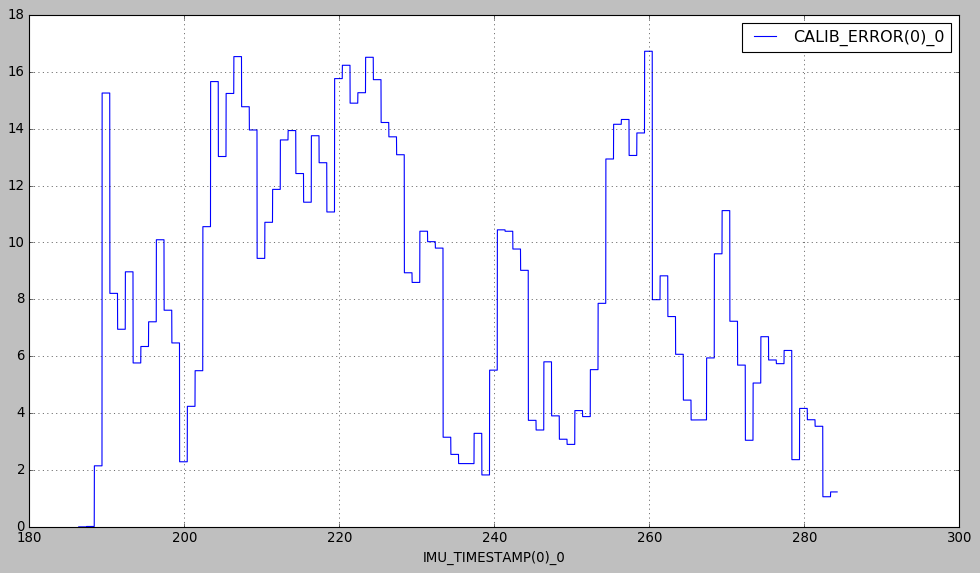

In [ ]:
# Adjust plot style
plt.figure(figsize=(15, 8), dpi=80)
plt.grid(True)
plt.style.use('classic')

# Show alternative plot
columns = []
# columns = ["ARM_SHOULDER_ORIENTATION(0)_0", "ARM_SHOULDER_ORIENTATION(0)_1", "ARM_SHOULDER_ORIENTATION(0)_2", "ARM_SHOULDER_ORIENTATION(0)_3"]
# columns += ["ARM_ELBOW_ORIENTATION(0)_0", "ARM_ELBOW_ORIENTATION(0)_1", "ARM_ELBOW_ORIENTATION(0)_2", "ARM_ELBOW_ORIENTATION(0)_3"]
# columns += ["IMU_QUATERNION(1)_0", "IMU_QUATERNION(1)_1", "IMU_QUATERNION(1)_2", "IMU_QUATERNION(1)_3"]
# columns += ["CALIB_ROT_VECTOR(0)_0", "CALIB_ROT_VECTOR(0)_1", "CALIB_ROT_VECTOR(0)_2"]
# columns += ["CALIB_ROT_VECTOR(1)_0", "CALIB_ROT_VECTOR(1)_1", "CALIB_ROT_VECTOR(1)_2"]
columns += ["CALIB_ERROR(0)_0"]
# columns += ["CALIB_COST_DERIVATIVE(0)_0", "CALIB_COST_DERIVATIVE(0)_1", "CALIB_COST_DERIVATIVE(1)_0", "CALIB_COST_DERIVATIVE(1)_1"]
legend = []
for col in columns:
    if col in df.columns[1:]:
        plt.plot(df[df.columns[0]], df[col])
        legend.append(col)
plt.legend(legend)
plt.xlabel(df.columns[0])
plt.show()